In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.patches import ArrowStyle
from matplotlib import cm
import pandas as pd

# scatterplot

### 1

In [37]:
data = sns.load_dataset('mpg')

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [46]:
data[data['name']=='ford torino']['cylinders'].values[0]

8

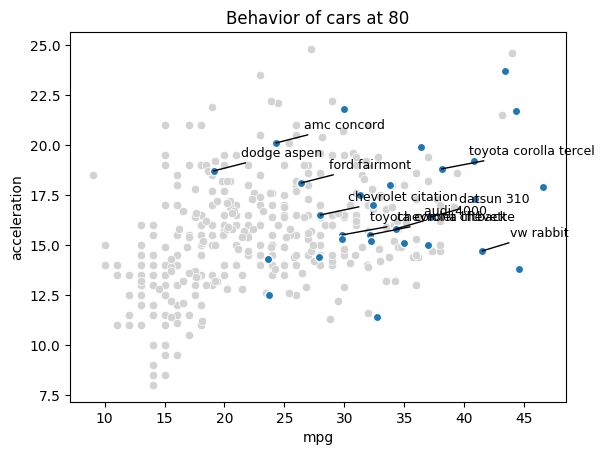

In [9]:
ax = sns.scatterplot(data,x='mpg',y='acceleration',color='lightgrey')
label_ind = data[data['model_year']==80].index
ax.scatter(x=data.loc[label_ind,'mpg'],y=data.loc[label_ind,'acceleration'],facecolors='tab:blue',edgecolors='white')
ax.set_xlabel('mpg')
ax.set_ylabel('acceleration')
ax.set_title('Behavior of cars at 80')   
for ind in label_ind[0:10]:
    ax.annotate(f"{data.loc[ind,'name']}",xy=(data.loc[ind,'mpg'],data.loc[ind,'acceleration']),xytext=(20,10),textcoords='offset points',
                           fontsize=9,color='black',arrowprops=dict(arrowstyle='-',shrinkA=0, shrinkB=0))

### 2

In [52]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


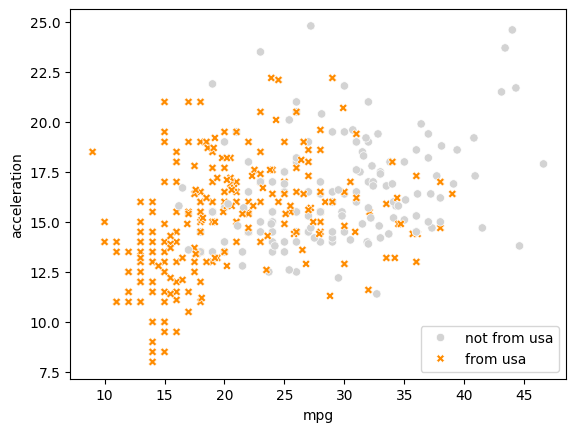

In [79]:
ax=sns.scatterplot(data,x='mpg',y='acceleration',hue=data['origin']=='usa',
                       palette=['lightgrey','darkorange'], style=data['origin']=='usa' , markers=['o','X'])
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['not from usa','from usa'], loc='lower right')

### 3

In [9]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


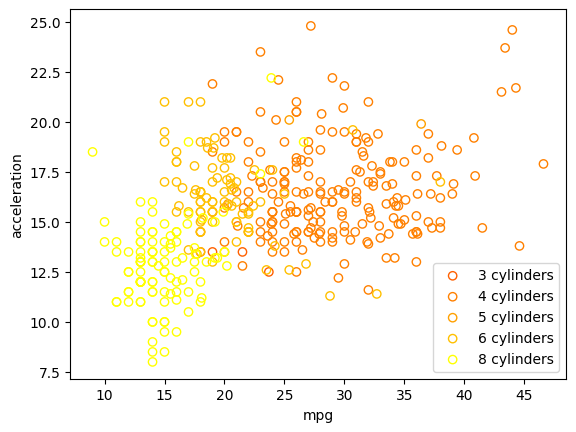

In [27]:
cmap1 = plt.get_cmap('autumn')
N=data.cylinders.max()
fig, ax = plt.subplots()
for n in sorted(data.cylinders.unique()):
    datasub=data[data.cylinders==n]
    ax.scatter(data=datasub, x='mpg',y='acceleration', facecolors='none', edgecolors=cmap1(n/N),label=f'{n} cylinders')
ax.set_xlabel('mpg')
ax.set_ylabel('acceleration')
ax.legend()

# barplot

## count

### 1

In [34]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: xlabel='cylinders', ylabel='count'>

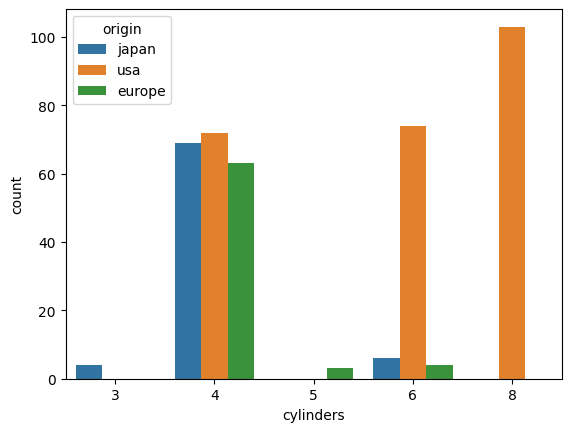

In [35]:
sns.countplot(data,x='cylinders',hue='origin',hue_order=['japan','usa','europe'])

### 2

In [ ]:
data = sns.load_dataset("mpg")
data.head()

<Axes: xlabel='cylinders', ylabel='Proportion'>

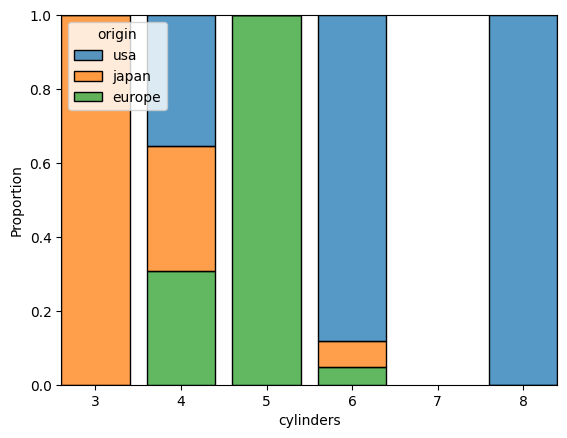

In [36]:
sns.histplot(data,x='cylinders',hue='origin',multiple="fill", stat="proportion",
    discrete=True, shrink=.8)

## bar

### 1

In [137]:
data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [138]:
data.sort_values('total',inplace=True)

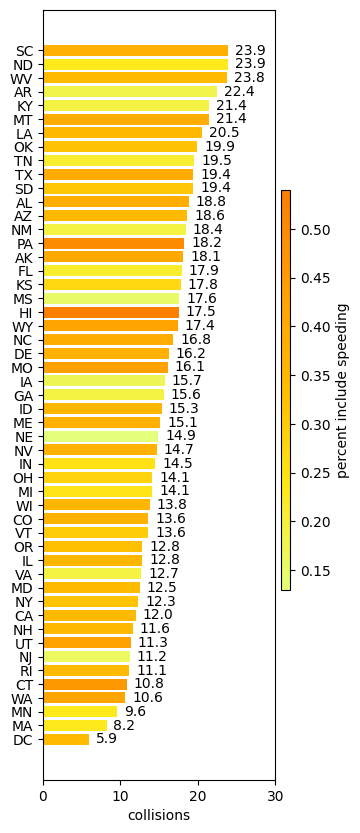

In [139]:
fig, ax=plt.subplots(figsize=(3,10))
norm = plt.Normalize((data.speeding/data.total).min(), (data.speeding/data.total).max()) 
#you can use other value for min and max if you don't want it explore the whole range of colormap
cmap = plt.get_cmap("Wistia")

ax.barh(width="total", y="abbrev", data=data, color=cmap(norm((data.speeding/data.total).values)))
ax.set_xlim([0,30])
ax.set_xlabel('collisions')
cax = fig.add_axes([0.92, 0.3, 0.03, 0.4])
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation='vertical')
cax.set_ylabel('percent include speeding');
for p,label in zip(ax.patches,data['total']):
    ax.annotate(f"{label:.1f}", 
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### 2

In [92]:
data = sns.load_dataset('car_crashes')
data.sort_values('total',inplace=True)
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
21,8.2,1.886,2.870,7.134,6.560,1011.14,135.63,MA
23,9.6,2.208,2.784,8.448,8.448,777.18,133.35,MN
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT


Text(0.5, 0, 'collisions')

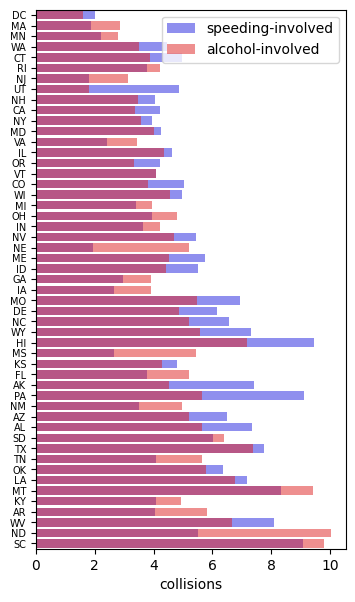

In [118]:
fig, ax = plt.subplots(figsize=(4, 7))
sns.barplot(data,x='speeding',y='abbrev',color='blue',alpha=0.5, label='speeding-involved', ax=ax)
sns.barplot(data,x='alcohol',y='abbrev',color='red',alpha=0.5, label='alcohol-involved', ax=ax)
#handles, labels  =  ax.get_legend_handles_labels()
ax.legend()
ax.yaxis.set_tick_params(labelsize=7)
ax.set_ylabel(None);
ax.set_xlabel('collisions')

# boxplot

### 1

In [2]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/tmp/ipykernel_5243/4188425394.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


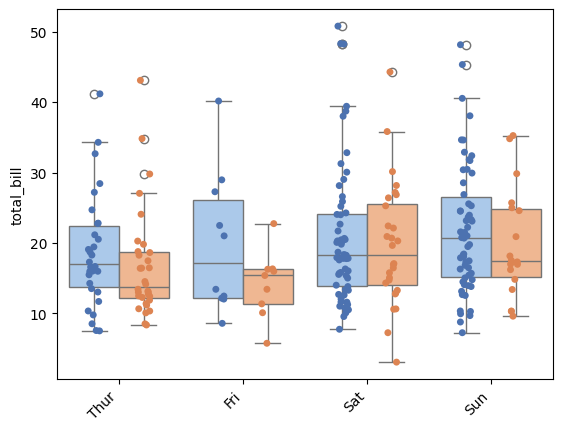

In [123]:
ax = sns.boxplot(data,y='total_bill',x='day',hue='sex',hue_order=['Male','Female'],dodge=True,palette='pastel')
sns.stripplot(data,y='total_bill',x='day',hue='sex',hue_order=['Male','Female'],dodge=True,palette='deep',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.get_legend().remove()
ax.set_xlabel(None);

### 2

In [154]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/tmp/ipykernel_32235/158367146.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


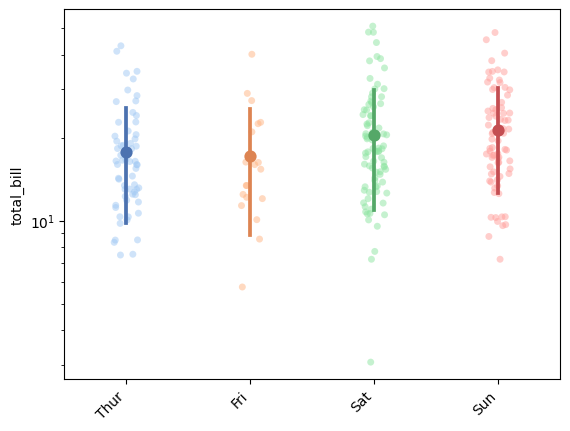

In [8]:
ax = sns.stripplot(data,y='total_bill',x='day',hue='day',palette='pastel',alpha=0.5, legend=False, zorder=0)
sns.pointplot(data,y='total_bill',x='day',hue='day',palette='deep',ax=ax,errorbar=('sd',1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_yscale('log')
ax.set_xlabel(None);

/tmp/ipykernel_32235/1804000448.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


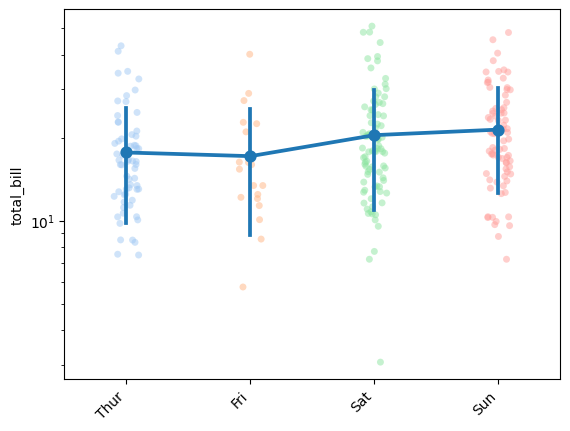

In [6]:
ax = sns.stripplot(data,y='total_bill',x='day',hue='day',palette='pastel',alpha=0.5, legend=False, zorder=0)
sns.pointplot(data,y='total_bill',x='day',ax=ax,errorbar=('sd',1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_yscale('log')
ax.set_xlabel(None);

/tmp/ipykernel_5243/3233319100.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


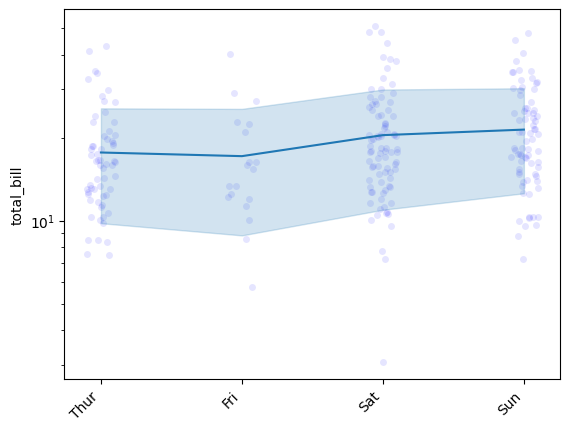

In [165]:
ax = sns.stripplot(data,y='total_bill',x='day',color='blue',alpha=0.1,zorder=0)
sns.lineplot(data,y='total_bill',x='day',errorbar=('sd',1),markers=True,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_yscale('log')
ax.set_xlabel(None);

# heatmap

### 1

In [32]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
data_agg=data.pivot_table(index="model_year", columns="origin", values="mpg",aggfunc='mean')

In [34]:
data_agg.head()

origin,europe,japan,usa
model_year,,,
70,25.20,25.500000,15.272727
71,28.75,29.500000,18.100000
72,22.00,24.200000,16.277778
73,24.00,20.000000,15.034483
74,27.00,29.333333,18.333333


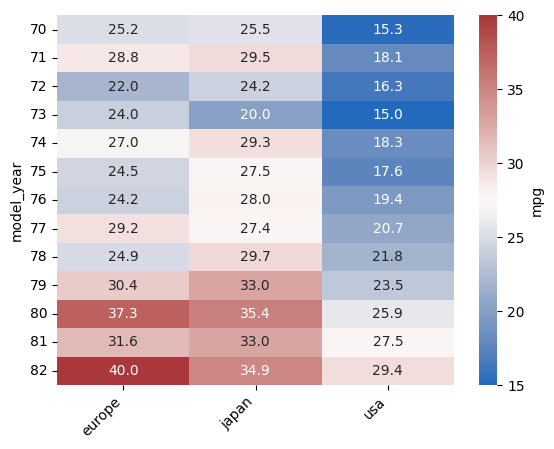

In [40]:
ax = sns.heatmap(data_agg, annot=True,fmt='.1f', vmax=40,vmin=15,cmap='vlag',cbar=True,cbar_kws={'label':'mpg'})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=00, ha='right')
ax.set_xlabel(None);

### 2

In [66]:
data = sns.load_dataset("mpg")
data_agg=data.pivot_table(index="model_year", columns="origin", values="mpg",aggfunc='mean')
data_agg.head()

origin,europe,japan,usa
model_year,,,
70,25.20,25.500000,15.272727
71,28.75,29.500000,18.100000
72,22.00,24.200000,16.277778
73,24.00,20.000000,15.034483
74,27.00,29.333333,18.333333


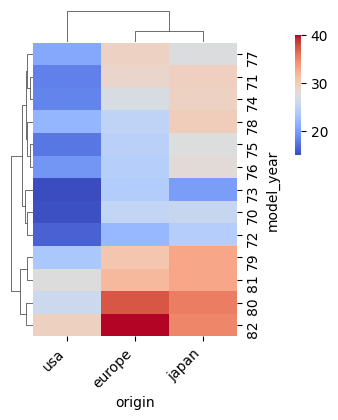

In [68]:
ax = sns.clustermap(data_agg,figsize=(3,4),cbar_pos=(1, 0.6, 0.02, 0.3),
               cmap='coolwarm',dendrogram_ratio=0.1);
plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation = 45, ha='right');

### 3

In [69]:
data = sns.load_dataset("mpg")
data_agg=data.pivot_table(index="model_year", columns="origin", values="mpg",aggfunc='mean')
data_agg.head()

origin,europe,japan,usa
model_year,,,
70,25.20,25.500000,15.272727
71,28.75,29.500000,18.100000
72,22.00,24.200000,16.277778
73,24.00,20.000000,15.034483
74,27.00,29.333333,18.333333


In [72]:
data_annot = data_agg.map(lambda x: "*" if x<25 else '')

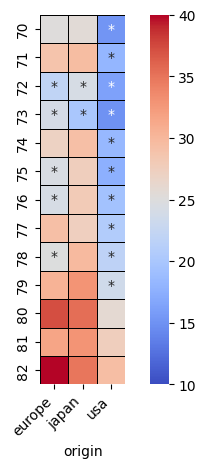

In [83]:
ax = sns.heatmap(data_agg,
                 annot=data_annot,fmt='',
                 vmin=10,vmax=40,cmap='coolwarm',linewidth=0.5,linecolor='black',square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel(None);

### 4

In [147]:
data = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

In [141]:
used_networks = [3,4,5,6,7]
used_columns = (data.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
data=data.loc[:,used_columns]

In [142]:
data.head()

network          3                     4                     5             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        26.203819 -49.715569  47.461037  26.746613 -35.898861  -1.889181   
1       -28.274963 -39.050129  -1.210660 -19.012897  19.568010  15.902983   
2       -18.842947  -1.214659 -65.575806 -85.777428  19.247454  37.209419   
3        -7.420454  17.119448 -41.800869 -58.610184  32.896915  11.199619   
4       -45.216927   3.483550 -62.613335 -49.076508  18.396759   3.219077   

network          6                                           7             \
node             1                     2                     1              
hemi            lh         rh         lh         rh         lh         rh   
0         5.898688 -43.692322 -47.664265  12.284122   1.566538 -13.042585   
1       -23.231823 -10.745867  10.269546  31.275831 -26.309488 -18.077026   
2         2.392153  16.509109  -5.314236   2.372976  -7.342168 -24.550989   
3       -14.665752   2.073715  32.634335  45.825409 -47.632999  -6.580215   
4       -41.856911 -24.690414 -33.975418 -24.149668  -6.315651 -29.344135   

network                                              
node             2                     3             
hemi            lh         rh         lh         rh  
0        -1.855260 -39.805901 -30.831512 -61.137009  
1       -10.259323 -43.488678 -63.965630  47.789856  
2         1.774612  32.257950  -1.835028 -29.464401  
3        -2.768599 -25.282215 -14.930727  10.123429  
4       -52.696259 -41.713947 -13.849936 -58.447361

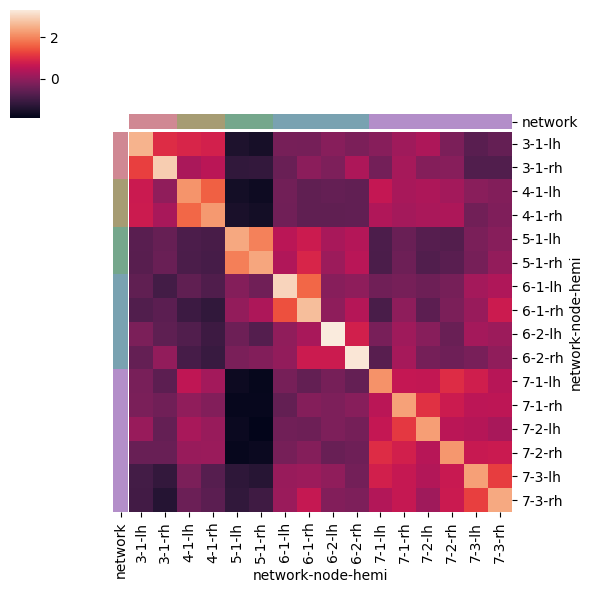

In [146]:
lut = dict(zip(map(str,used_networks), sns.husl_palette(5, s=.45)))
col_colors = pd.Series(data.columns.get_level_values("network"), index=data.columns).map(lut)
sns.clustermap(data.corr(), figsize=(6,6), col_colors=col_colors, row_colors=col_colors, col_cluster=False,row_cluster=False,z_score=0)

# pie chart

In [28]:
data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


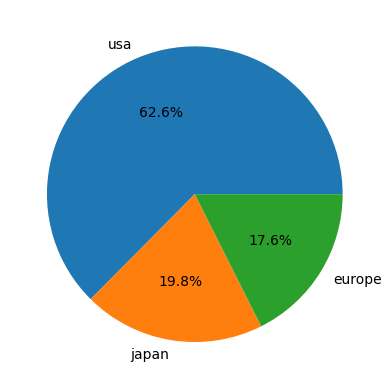

In [31]:
ax = data['origin'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_ylabel(None);

# network

### 1

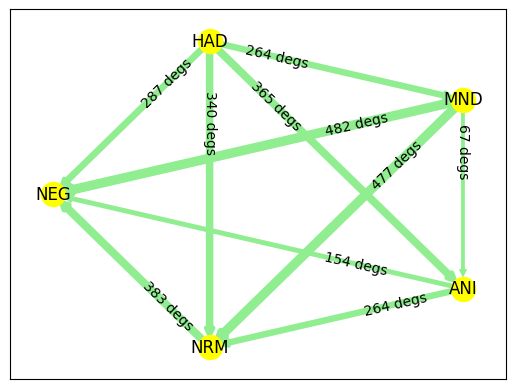

In [51]:
# make network from random data:
stages = ['NEG','NRM','ANI','MND','HAD']
nxG = nx.DiGraph()
nxG.add_nodes_from(stages)
for i in range(0,4):
    for j in range(i+1,5):
        nxG.add_edge(stages[j],stages[i],weight=np.random.randint(1,500))

pos = nx.shell_layout(nxG)
nx.draw_networkx(nxG,pos=pos,arrowstyle=ArrowStyle("simple"), edge_color='lightgreen',node_color='yellow',
                 width=0.01*np.array([x[2]['weight'] for x in nxG.edges.data()]),)
labels = {
        tuple(edge): f"{attrs['weight']} degs"
        for *edge, attrs in nxG.edges.data()
    };
nx.draw_networkx_edge_labels(
        nxG,
        pos,
        labels,
        label_pos=0.25,
        font_color="k",
        bbox={"alpha": 0},
        #ax=ax,
    );

### 2

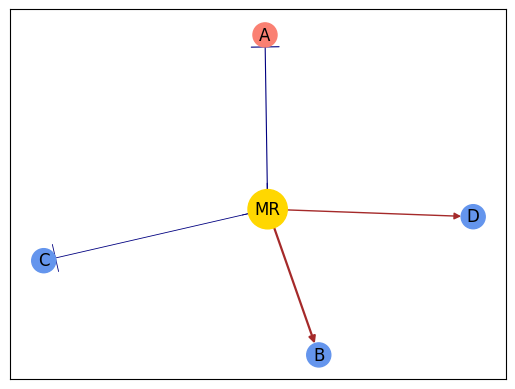

In [50]:
# build graph
targets=['A','B','C','D']
nxG = nx.DiGraph()
nxG.add_nodes_from(['MR']+targets)
nxG.add_edges_from([('MR',target) for target in targets])
nxG.nodes['MR']['color']='gold'
nxG.nodes['MR']['class']='MR'
for target in targets:
    nxG.nodes[target]['color']='salmon' if target=='A' else 'cornflowerblue'
    nxG.nodes[target]['class']='target'
for target in targets:
    nxG.edges['MR',target]['tfmode'] = np.random.randint(-5,5)
    nxG.edges['MR',target]['likelihood'] = np.random.randint(1,10)/10

#draw graph
pos = nx.spring_layout(nxG)
nx.draw_networkx_nodes(nxG, pos=pos, node_color=[node[1]['color'] for node in nxG.nodes.data()], node_size=[800 if node[1]['class']=='MR' else 300 for node in nxG.nodes.data()])
nx.draw_networkx_labels(nxG, pos)
for edge in nxG.edges.data():
    arrowstyle = ArrowStyle("|-|",widthA=1.0, angleA=90, widthB=1.0, angleB=0) if edge[2]['tfmode']<0 else ArrowStyle("-|>")
    edgecolor = 'brown' if edge[2]['tfmode']>0 else 'navy'
    nx.draw_networkx_edges(nxG, pos, edgelist=[(edge[0],edge[1])], arrowstyle=arrowstyle, width=edge[2]['likelihood']*2, edge_color=edgecolor)
plt.show()

# gridplot

## scatter subplot

In [ ]:
data = sns.load_dataset('mpg')
data.head()

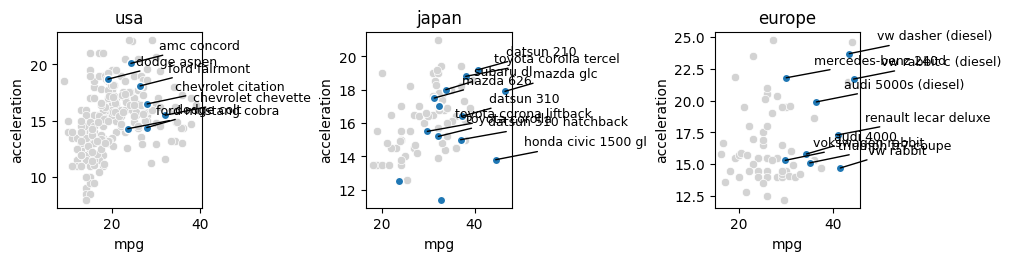

In [17]:
fig=plt.figure(figsize=(10,2.5),layout='constrained')
idx=0
for origin in data['origin'].unique():
    idx+=1
    ax=plt.subplot(1,3,idx)
    data2=data[data['origin']==origin]
    sns.scatterplot(data2,x='mpg',y='acceleration',color='lightgrey', ax=ax)
    label_ind = data2[data2['model_year']==80].index
    ax.scatter(x=data2.loc[label_ind,'mpg'],y=data2.loc[label_ind,'acceleration'],facecolors='tab:blue',edgecolors='white')
    ax.set_xlabel('mpg')
    ax.set_ylabel('acceleration')
    ax.set_title(origin)   
    for ind in label_ind[0:10]:
        ax.annotate(f"{data2.loc[ind,'name']}",xy=(data2.loc[ind,'mpg'],data2.loc[ind,'acceleration']),xytext=(20,10),textcoords='offset points',
                               fontsize=9,color='black',arrowprops=dict(arrowstyle='-',shrinkA=0, shrinkB=0))    

## heatmap subplot

In [56]:
data = sns.load_dataset('mpg')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [39]:
data_agg1=data.pivot_table(index="model_year", columns="origin", values="mpg",aggfunc='min')
data_agg2=data.pivot_table(index="model_year", columns="origin", values="mpg",aggfunc='max')


origin,europe,japan,usa
model_year,,,
70,24.0,24.0,9.0
71,27.0,25.0,12.0
72,18.0,19.0,11.0
73,19.0,18.0,11.0
74,24.0,24.0,13.0


/tmp/ipykernel_5243/3473103038.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


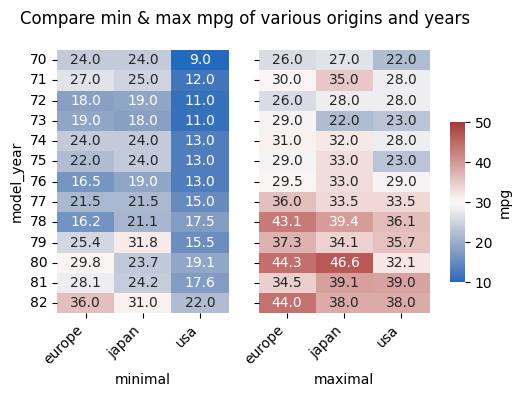

In [43]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5,4),sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
sns.heatmap(data_agg1, ax=ax1,
                 annot=True,fmt='.1f',
                 vmax=50,vmin=10,cmap='vlag',cbar=True, cbar_ax=cbar_ax,cbar_kws={'label':'mpg'})
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, ha='right')
ax1.set_xlabel('minimal');
sns.heatmap(data_agg2,ax=ax2,
                 annot=True,fmt='.1f',
                 vmax=50,vmin=10,cmap='vlag',cbar=True, cbar_ax=cbar_ax,cbar_kws={'label':'mpg'})
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_xlabel('maximal')
ax2.set_ylabel(None)
fig.suptitle('Compare min & max mpg of various origins and years')
fig.tight_layout(rect=[0, 0, .9, 1])

## bar subplot

In [58]:
data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [60]:
data.sort_values('total',inplace=True)

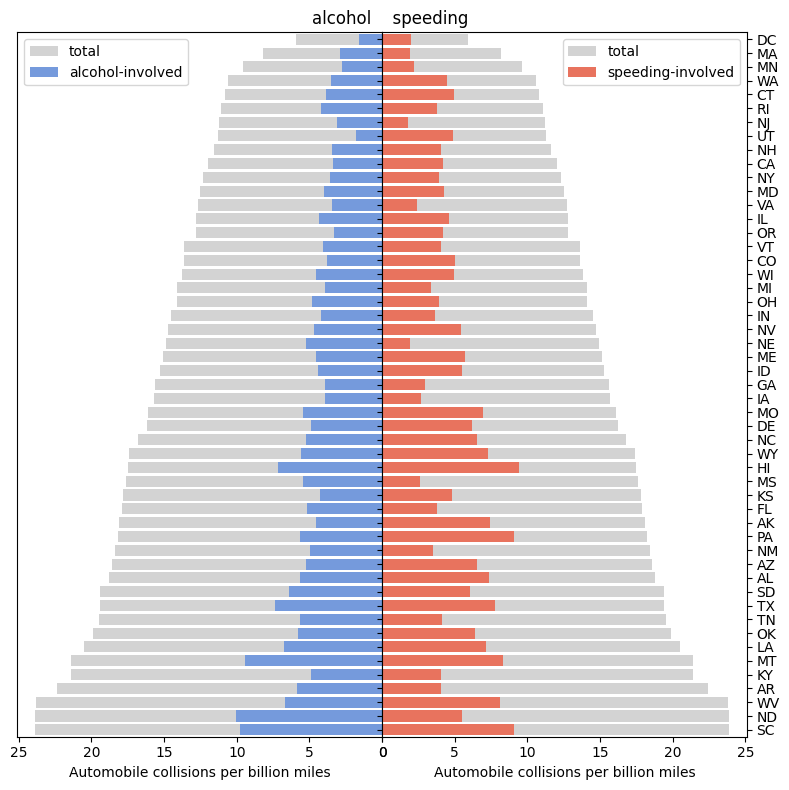

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 8), sharey=True, gridspec_kw={'wspace': 0})
sns.barplot(data, y='abbrev', x='total', orient='horizontal', color='lightgrey', ax=ax2, label='total')
sns.barplot(data, y='abbrev', x='speeding', orient='horizontal', color='tomato', ax=ax2, label='speeding-involved')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', labelright=True, right=True)
ax2.set_title('  '+'speeding', loc='left')
ax2.set_xlabel('Automobile collisions per billion miles')
ax2.legend(ncol=1, loc="upper right", frameon=True)

sns.barplot(data, y='abbrev', x='total', orient='horizontal', color='lightgrey', ax=ax1, label='total')
sns.barplot(data, y='abbrev', x='alcohol', orient='horizontal', color='cornflowerblue', ax=ax1, label='alcohol-involved')
ax1.set_xlabel('Automobile collisions per billion miles')
ax1.legend(ncol=1, loc="upper left", frameon=True)
xmax = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
ax1.set_xlim(xmax=xmax)
ax2.set_xlim(xmax=xmax)

ax1.invert_xaxis()  # reverse the direction
ax1.tick_params(labelleft=False, left=False)
ax1.set_ylabel('')
ax1.set_title('alcohol'+'  ', loc='right')

plt.tight_layout()
plt.show()